In [1]:
from astropy.io import fits
import numpy as np
import math
import matplotlib.pyplot as plt
data=fits.open('asu.fit')
data.info()
s1=data[1].header
s2=fits.getdata('asu.fit',1)
#print(s1)
d1=[]
d2=[]
d3=[]
u1=[]
u2=[]
u3=[]
u4=[]
u5=[]
n=data[1].data.names
print (n)
j=0
for i in range(99999):
    if(s2['Plx'][i] > 0. and 3.*s2['e_Plx'][i] < s2['Plx'][i] and (s2['Vmag'][i]+5* np.log10(s2['Plx'][i])-10<=9.)):
        u1.append(s2['Vmag'][i]+5* np.log10(s2['Plx'][i]*0.001)+5)
        u2.append(1/(s2['Plx'][i]*0.001))
        u3.append(s2['B-V'][i])
        #s2['RA（ICRS）'][i]
       # s22.append(','.join(s2['RAhms'][i].split()))
        u4.append(s2[i][7])
        u5.append(s2['DE_ICRS_'][i])
        j=j+1
        
#print(j)
#print (u4)
for i in range(j):
        if(u4[i] <= 10. and u4[i] >= -10. and u5[i] <=10. and u5[i] >=-10 and ((u1[i]<=1.0 and u2[i]<=200) or (u1[i]>1.0 and u1[i] <= 2.5 and u2[i]<=110) or (u1[i]>2.5 and u1[i]<=5.5 and u2[i] <=75.) or (u1[i]<=7.2 and u1[i] >5.5 and u2[i] <40.) )):
                d1.append(u2[i])
                d2.append(u1[i])
                #d3.append(u3[i])

Filename: asu.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   ()      
  1  I_239_hip_main    1 TableHDU        65   99999R x 12C   [I6, A11, A11, F5.2, F12.8, F12.8, F7.2, F8.2, F8.2, F6.2, F6.3, A1]   
['HIP', 'RAhms', 'DEdms', 'Vmag', 'RA_ICRS_', 'DE_ICRS_', 'Plx', 'pmRA', 'pmDE', 'e_Plx', 'B-V', 'Notes']


In [2]:

v2=[]
r = np.array([235,100,58,32])
#print(r[1])
for k in range(4):
    #print(k)
    v2.append(4 * 3.1416 * (r[k]**3)/(18*9*3))
print(v2)
v2[0]

[335566.19012345682, 25856.790123456791, 5044.9700345679012, 847.27529876543213]


335566.19012345682

In [3]:
print(len(d1))

424


In [4]:
import math
aa=np.histogram(d2,density=0,bins=10)
print(aa[1])
print(aa[0])
ee=aa[1]
bins=[0.]*10
bbc=[]
bbd=[]

bins2=[0.]*10

plt.figure(1)
for i in range(10):
    bins[i]=(aa[1][i]+aa[1][i+1])/2
   
    #bins2[i]=-(bins[i])/(3.5*0.4)+bins[i]
    bins2[i]=-(bins[i])/(3.5*2.5)
    if(bins[i] <=1.2):
         bbc.append(np.log10(aa[0][i]/v2[0])+10)
    if(bins[i]>1.2 and bins[i] <2.46):
        bbc.append(np.log10(aa[0][i]/v2[1])+10)
    if(bins[i] >=2.46 and bins[i] <=5.3):
        bbc.append(np.log10(aa[0][i]/v2[2])+10)
    #if(bins[i] >4.05 and bins[i] <=5.3):
      #  bbc.append(np.log10(aa[0][i]/v2[3])+10)
    if(bins[i] >5.3):
        bbc.append(np.log10(aa[0][i]/v2[3])+10)
    if(bins[i]<=3.5):
        bbd.append(bbc[i]+3*bins2[i]+0.9)
    else:bbd.append(bbc[i])
#print(len(bbc))
#print(len(bbd))
#print(len(bins))
#print(len(bins2))
print(bins)

[-2.72123742 -1.82663633 -0.93203525 -0.03743416  0.85716693  1.75176801
  2.6463691   3.54097019  4.43557127  5.33017236  6.22477345]
[  3   9  41 153  61  57  26  32  33   9]
[-2.2739368775233419, -1.3793357908997592, -0.48473470427617649, 0.40986638234740624, 1.304467468970989, 2.1990685555945717, 3.0936696422181544, 3.9882707288417372, 4.8828718154653199, 5.7774729020889026]


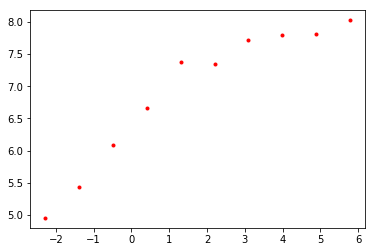

[-2.2739368775233419, -1.3793357908997592, -0.48473470427617649, 0.40986638234740624, 1.304467468970989, 2.1990685555945717, 3.0936696422181544, 3.9882707288417372, 4.8828718154653199, 5.7774729020889026]
[4.9513430575764223, 5.4284643122960849, 6.0870056595764961, 6.6589132336743591, 7.3727552246827361, 7.3433002453444605, 7.7121147569539747, 7.8022913873030628, 7.8156553488610445, 8.0262179641515754]


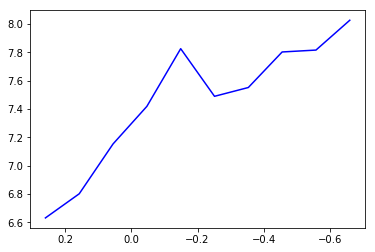

In [5]:
plt.plot(bins,bbc,'r.')
#plt.savefig('luminosity.png')
plt.show()
plt.figure(2)
ax = plt.gca()
#plt.axis([-0.6,0.4,5.3,7.5])
ax.invert_xaxis()

plt.plot(bins2,bbd,'b')
print(bins)
print(bbc)
#plt.savefig('initial_mass.png')
plt.show()

In [6]:
#aa = np.histogram(d2,density=0,bins=10)
#print (aa[0])   # number of stars in different intervals of luminosity
#print (aa[1])   # bins

In [7]:
#k=[0.]*10
#for i in range(10):
 #   k[i] = (aa[1][i]+aa[1][i+1])/2
#plt.plot(k,aa[0],'r.')
#plt.savefig('luminosity.png')
#plt.show()

#ax = plt.gca()
#plt.axis([-0.6,0.4,5.3,7.5])
#ax.invert_xaxis()

In [8]:
#L=M**3.5, t=M**(-2.5),log10(L)=Vm, 10**(Vm)=t**(-2.5*3.5),logm(t)=-2.5


